<a href="https://colab.research.google.com/github/DamilolaeO/protein_mutation_analysis/blob/main/Protein_mutation__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
sift_df = pd.read_csv("https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv", sep="\s+")
foldx_df = pd.read_csv("https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv", sep="\s+")

print(sift_df.columns)
print(foldx_df.columns)


Index(['Protein', 'Amino_Acid', 'sift_Score'], dtype='object')
Index(['Protein', 'Amino_Acid', 'foldX_Score'], dtype='object')


In [ ]:
# Create the specific_Protein_aa column
sift_df["specific_Protein_aa"] = sift_df["Protein"].astype(str) + "_" + sift_df["Amino_Acid"].astype(str)
foldx_df["specific_Protein_aa"] = foldx_df["Protein"].astype(str) + "_" + foldx_df["Amino_Acid"].astype(str)


print(sift_df.head())
print(foldx_df.head())


  Protein Amino_Acid  sift_Score specific_Protein_aa
0  A5A607       K60Q    0.197799         A5A607_K60Q
1  A5A607       Y56C    0.174970         A5A607_Y56C
2  A5A607       Y56S    0.415581         A5A607_Y56S
3  A5A630       A16V    0.516738         A5A630_A16V
4  A5A630       A47T    0.387271         A5A630_A47T
  Protein Amino_Acid  foldX_Score specific_Protein_aa
0  A5A607       E63D      1.84216         A5A607_E63D
1  A5A607       K60Q      0.51710         A5A607_K60Q
2  A5A607       Y56C      0.72870         A5A607_Y56C
3  A5A607       Y56S      0.84212         A5A607_Y56S
4  P00350      A117S     -0.09854        P00350_A117S


In [ ]:
#confirming the new column
print(sift_df.columns)
print(foldx_df.columns)


Index(['Protein', 'Amino_Acid', 'sift_Score', 'specific_Protein_aa'], dtype='object')
Index(['Protein', 'Amino_Acid', 'foldX_Score', 'specific_Protein_aa'], dtype='object')


In [ ]:
#merge the dataframes
final_df = pd.merge(sift_df, foldx_df, on="specific_Protein_aa", how="inner")
print(final_df.head())

  Protein_x Amino_Acid_x  sift_Score specific_Protein_aa Protein_y  \
0    A5A607         K60Q    0.197799         A5A607_K60Q    A5A607   
1    A5A607         Y56C    0.174970         A5A607_Y56C    A5A607   
2    A5A607         Y56S    0.415581         A5A607_Y56S    A5A607   
3    P00350        A117S    0.401519        P00350_A117S    P00350   
4    P00350        A117T    0.282769        P00350_A117T    P00350   

  Amino_Acid_y  foldX_Score  
0         K60Q      0.51710  
1         Y56C      0.72870  
2         Y56S      0.84212  
3        A117S     -0.09854  
4        A117T      0.92352  


In [ ]:
print(final_df.columns)

Index(['Protein_x', 'Amino_Acid_x', 'sift_Score', 'specific_Protein_aa',
       'Protein_y', 'Amino_Acid_y', 'foldX_Score'],
      dtype='object')


In [ ]:
# Filter for mutations affecting both structure & function
deleterious_mutations = final_df[
    (final_df["sift_Score"] < 0.05) & (final_df["foldX_Score"] > 2)
]

print(deleterious_mutations.shape)  # Number of rows & columns
print(deleterious_mutations.head())  # Show first few results


(5261, 7)
    Protein_x Amino_Acid_x  sift_Score specific_Protein_aa Protein_y  \
82     P00350         G48C    0.031864         P00350_G48C    P00350   
100    P00350        L115F    0.028872        P00350_L115F    P00350   
102    P00350        L204F    0.009560        P00350_L204F    P00350   
103    P00350        L208R    0.027592        P00350_L208R    P00350   
209    P00363        I150F    0.048688        P00363_I150F    P00363   

    Amino_Acid_y  foldX_Score  
82          G48C      2.25298  
100        L115F      3.12672  
102        L204F      3.31406  
103        L208R      4.38690  
209        I150F      9.18496  


In [ ]:
# Extract the first letter (original amino acid)
deleterious_mutations["Original_AA"] = deleterious_mutations["Amino_Acid_x"].str[0]

print(deleterious_mutations[["Amino_Acid_x", "Original_AA"]].head())

    Amino_Acid_x Original_AA
82          G48C           G
100        L115F           L
102        L204F           L
103        L208R           L
209        I150F           I


<ipython-input-9-0582f400381d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deleterious_mutations["Original_AA"] = deleterious_mutations["Amino_Acid_x"].str[0]


In [ ]:
# Count occurrences (FREQUENCY) of each amino acid
amino_acid_counts = deleterious_mutations["Original_AA"].value_counts()
print(amino_acid_counts)


Original_AA
G    1307
L     739
A     640
P     470
V     380
R     227
I     212
Y     172
D     171
F     169
S     158
T     126
W     108
M      87
C      74
N      60
E      50
H      47
Q      40
K      24
Name: count, dtype: int64


In [ ]:
# Frequency table
amino_acid_freq_table = amino_acid_counts.reset_index()
amino_acid_freq_table.columns = ["Amino_Acid", "Frequency"]

print(amino_acid_freq_table)


   Amino_Acid  Frequency
0           G       1307
1           L        739
2           A        640
3           P        470
4           V        380
5           R        227
6           I        212
7           Y        172
8           D        171
9           F        169
10          S        158
11          T        126
12          W        108
13          M         87
14          C         74
15          N         60
16          E         50
17          H         47
18          Q         40
19          K         24


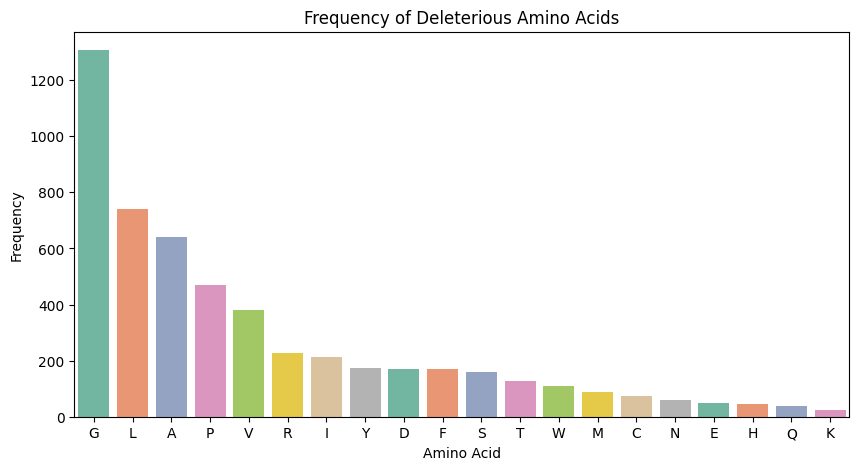

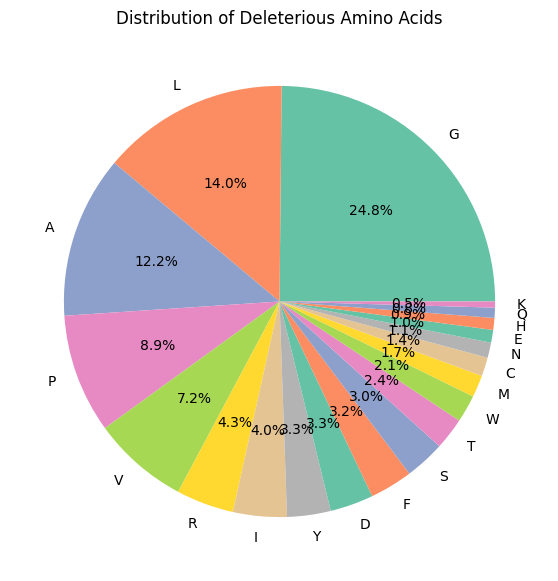

In [ ]:
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot
plt.figure(figsize=(10, 5))
sns.barplot(x="Amino_Acid", y="Frequency", data=amino_acid_freq_table, hue="Amino_Acid", palette="Set2", legend=False)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Frequency of Deleterious Amino Acids")
plt.show()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(amino_acid_counts, labels=amino_acid_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2", len(amino_acid_counts)))
plt.title("Distribution of Deleterious Amino Acids")
plt.show()


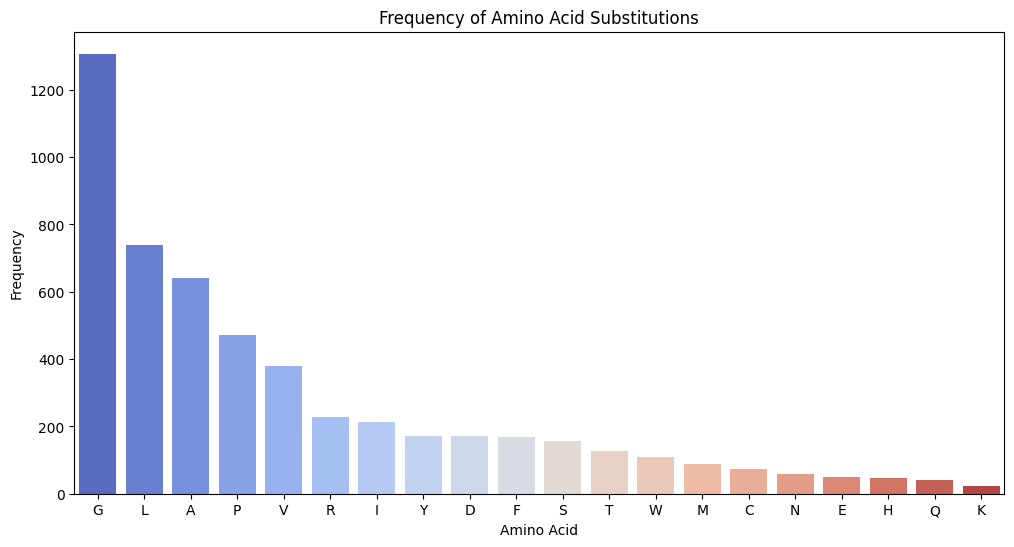

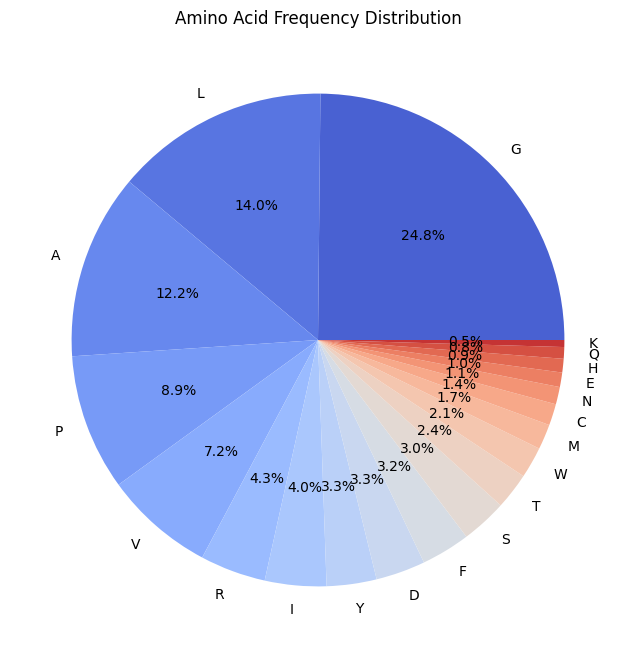

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="Amino_Acid", y="Frequency", data=amino_acid_freq_table, hue="Amino_Acid", palette="coolwarm", legend=False)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Frequency of Amino Acid Substitutions")
plt.show()

# Generate pie chart
plt.figure(figsize=(8, 8))
plt.pie(amino_acid_freq_table["Frequency"], labels=amino_acid_freq_table["Amino_Acid"], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(amino_acid_freq_table)))
plt.title("Amino Acid Frequency Distribution")
plt.show()


The amino acid Glycine (G) appears most frequently in deleterious mutations. Glycine is unique because it has no side chain, making it highly flexible. A mutation in glycine can disrupt protein folding and stability, leading to severe structural and functional consequences.

In [ ]:
# AA with more than 100 occurrences
high_occurrence_aa = amino_acid_freq_table[amino_acid_freq_table["Frequency"] > 100]
print(high_occurrence_aa)


   Amino_Acid  Frequency
0           G       1307
1           L        739
2           A        640
3           P        470
4           V        380
5           R        227
6           I        212
7           Y        172
8           D        171
9           F        169
10          S        158
11          T        126
12          W        108


Amino acids with more than 100 occurrences tend to be small and flexible (e.g., Glycine) or highly reactive (e.g., Cysteine). These properties make them prone to mutations that significantly alter protein structure and function.